$\Huge Computational$ $\Huge Intelligence$ $\Huge Lab$

$\Huge  Assignment$ $\Huge 3$
---
Pawel Bryzek, gr.1A
---

# 3.1 Convolutional Neural Networks - Introduction


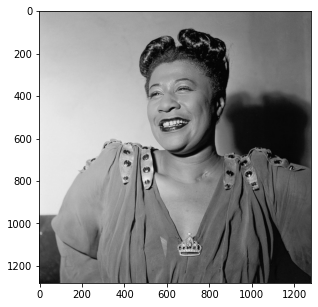

In [ ]:
#Load an image
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5, 5) 


response = requests.get('https://cdn.pixabay.com/photo/2016/05/11/18/57/ella-fitzgerald-1386214_1280.jpg')
img = Image.open(BytesIO(response.content))


plt.imshow(img)

X_img.shape=(1280, 1280, 3)
X.shape=(1280, 1280)


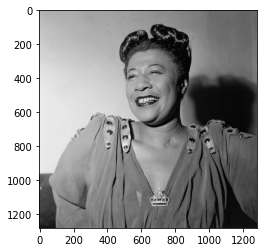

In [ ]:
import numpy as np
X_img = np.array(img)
print(f'X_img.shape={X_img.shape}')

X=X_img[:,:,0]
print(f'X.shape={X.shape}')
plt.rcParams['image.cmap'] = 'gray'
plt.imshow(X)

## Convolution 2D

During the convolution a small filter F slides along an image X. 
Then the filter elements are multiplied by corresponding pixel values and summed. Convolution can be used to blurr an image, but also detect edges or extract gradients of pixel intensity. 

[Diagram](https://miro.medium.com/max/928/0*e-SMFTzO8r7skkpc)


In [ ]:
def conv2D(X,F,bias=0):
  w = F.shape[1]//2
  h = F.shape[0]//2
  Y=[ [ np.sum(X[i-h:i+h+1,j-w:j+w+1]*F) + bias for j in np.arange(w,X.shape[1]-w)] for i in np.arange(h,X.shape[0]-h)]
  return np.array(Y)

In [ ]:
def apply_two_convolutions(X):
  F_sobel_y=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
  F_sobel_x=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

  XX = conv2D(X,F_sobel_x,1)
  XY = conv2D(X,F_sobel_y,1)
  return XX,XY

AX,AY = apply_two_convolutions(X)

In [ ]:
print(f'X.shape={X.shape} AX.shape={AX.shape} AY.shape={AY.shape}')

X.shape=(1280, 1280) AX.shape=(1278, 1278) AY.shape=(1278, 1278)


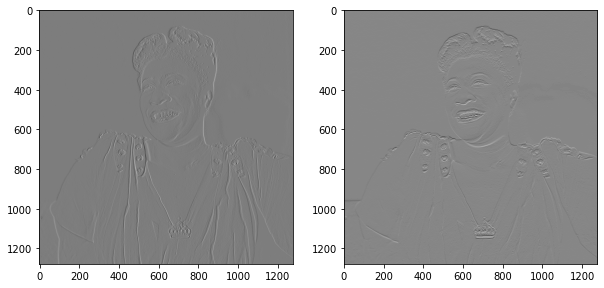

In [ ]:
def plot(X,Y,cmap='gray'):
  fig = plt.figure(figsize=(10,10))
  plt.set_cmap(cmap) 
  fig.add_subplot(1,2,1)
  # plt.axis('off')
  plt.imshow(X) 
  fig.add_subplot(1,2,2)
  plt.imshow(Y) 

plot(AX,AY)

During max pooling a window slides through an image (the strides are equal to the window sizes). At each position the maximal value of the pixel within the window is selected. Max pooling shrinks the image size. 

image size:(639, 639)


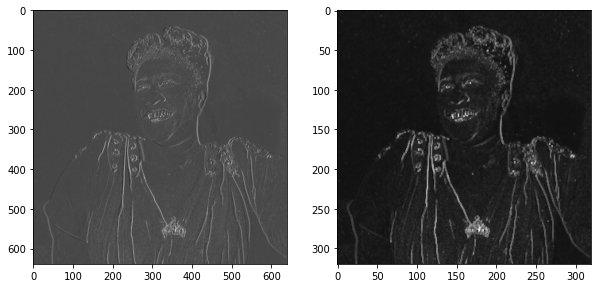

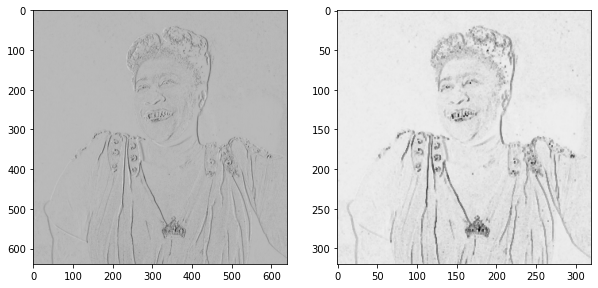

In [ ]:
def maxPool2D(X,shape):
  w = shape[1]
  h = shape[0]
  # print(f'h={h} w={w}')
  Y=[ [ np.max(X[i:i+h+1,j:j+w+1]) for j in np.arange(0,X.shape[1],shape[1])] for i in np.arange(0,X.shape[0],shape[0])]
  return np.array(Y)

AX=maxPool2D(AX,(2,2))
AY=maxPool2D(AX,(2,2))
plot(AX,AY)
plot(AX,AY,cmap='gray_r')
print(f'image size:{AX.shape}')

We will repeat the convolution and max-pooling steps several times... 

image size:(319, 319)


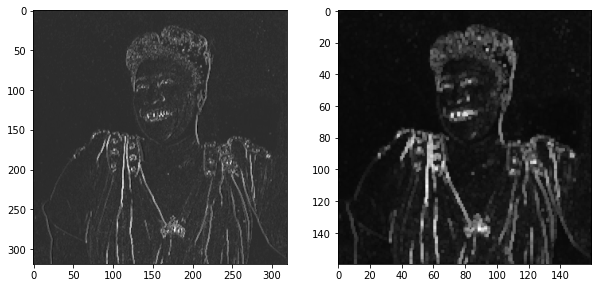

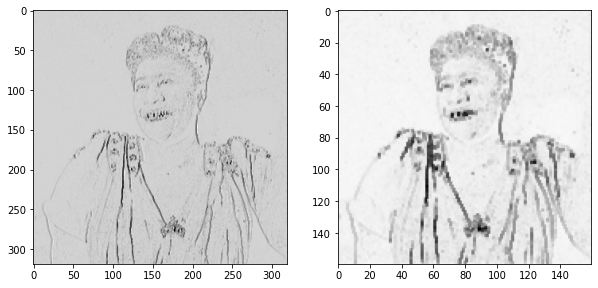

In [ ]:
AX,AY = apply_two_convolutions(AX)
AX=maxPool2D(AX,(2,2))
AY=maxPool2D(AX,(2,2))
plot(AX,AY)
plot(AX,AY,cmap='gray_r')
print(f'image size:{AX.shape}')

image size:(159, 159)


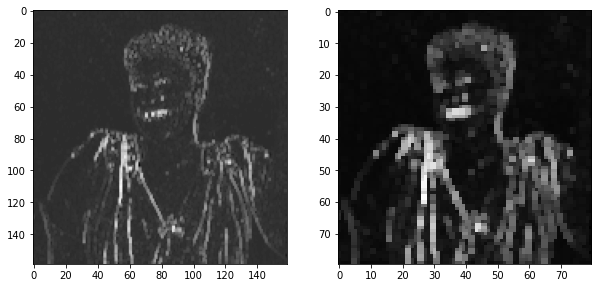

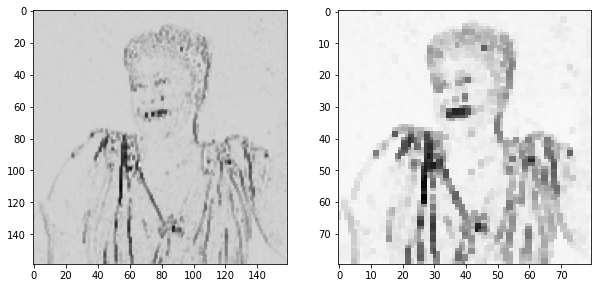

In [ ]:
AX,AY = apply_two_convolutions(AX)
AX=maxPool2D(AX,(2,2))
AY=maxPool2D(AX,(2,2))
plot(AX,AY)
plot(AX,AY,cmap='gray_r')
print(f'image size:{AX.shape}')

image size:(79, 79)


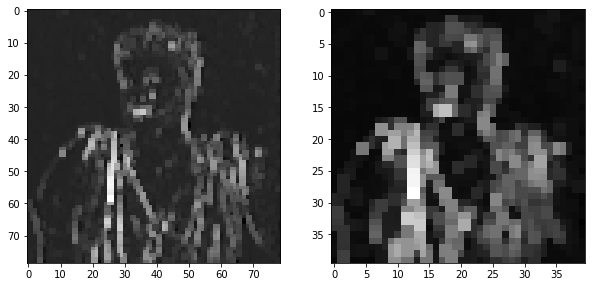

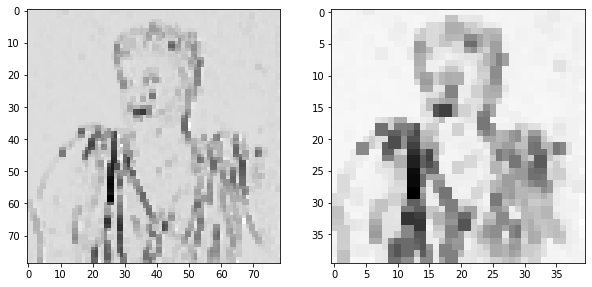

In [ ]:
AX,AY = apply_two_convolutions(AX)
AX=maxPool2D(AX,(2,2))
AY=maxPool2D(AX,(2,2))
plot(AX,AY)
plot(AX,AY,cmap='gray_r')
print(f'image size:{AX.shape}')

image size:(39, 39)


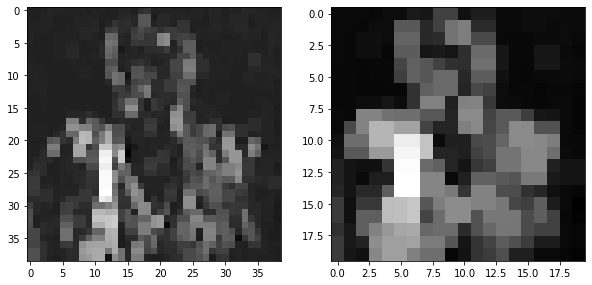

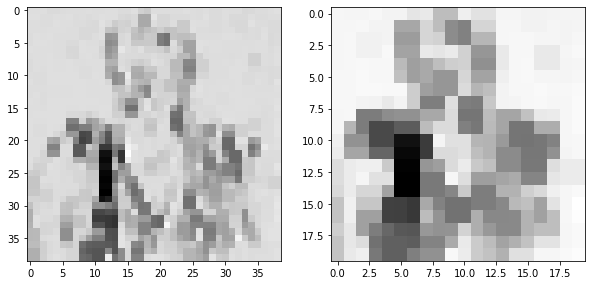

In [ ]:
AX,AY = apply_two_convolutions(AX)
AX=maxPool2D(AX,(2,2))
AY=maxPool2D(AX,(2,2))
plot(AX,AY)
plot(AX,AY,cmap='gray_r')
print(f'image size:{AX.shape}')

Probably the last convolution went too far...

Then the image is flattened (converted to a vector) and submitted as input to next processing steps (e.g. classification).

In [ ]:
AX_flattended = AX.flatten()
print(f'After flattening: {AX_flattended.shape}')

After flattening: (1521,)


## CNN

Typical process in image recogntion (old approach):

**Feature extraction**
1.   Preprocess an image (eg. apply filters, convert to grayscale)
2.   Select a convolution filter
3.   Apply convolution in order to extract features, use a functions like [scipy.signal.convolve2d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html), probably written in C
4.   Optionally: apply max pooling
5.   Optionally: repeat steps 2, 3, 4
**Training and testing**
6.   Select a classifier, e.g. SVM
7.   Train the classifier using vectors of extracted features as observations
8.   Test its performance
8.   If not satisfied return to 1



Basic ideas of CNNs:
*  Feature extraction is included into the training process: convolutional layers are parts of the architecture
*  No savvy filter selection is required: filters are learned (based on the loss function that expresses classification or regression goals)
*  At a given steps a number of filters can be applied simultaneously adding the corresponding number of channels at output
*  Architecture may contain multiple sequences of convolution and pooling steps. It is believed that this corresponds to extracting more and more abstract features, eg: 
   * First sequence: extract contours
   * Second layer: extract such objects as eyes, noses
   * Third layer: extract faces, etc 

**TODO 3.1.1** Calculate the number of trainable parameters. 

Provide the formula that gives the number of trainable parameters based on the values of defined variables.

$P=((kernelsize[0] * kernelsize[1] * channels +1)*filters) + Tensorshapeafterpooling[0] * Tensorshapeafterpooling[1] * Tensorshapeafterpooling[2] + Outputshape$

Fill in the table below

| (img_cols,img_rows) | channels | filters | kernel size | Tensor shape after convolution | Tensor shape after pooling | number of parameters |
|---------------------|----------|---------|-------------|--------------------------------|----------------------------|----------------------|
| (10,10)             | 1        | 1       | (3,3)       | (None, 8, 8, 1)                            | (None, 4, 4, 1)                        | 27                  |
| (10,10)             | 1        | 5       | (3,3)       |(None, 8, 8, 5)                                |(None, 4, 4, 5)                            |131                      |
| (10,10)             | 3        | 1       | (5,5)       |(None, 6, 6, 1)                                |(None, 3, 3, 1)                            |86                      |
| (10,10)             | 3        | 5       | (3,3)       |(None, 8, 8, 5)                                |(None, 4, 4, 5)                            |221                      |
| (16,16)             | 3        | 64      | (3,3)       |(None, 14, 14, 64)                                |(None, 7, 7, 64)                            |4929                      |


Observe the following:
*   None in an output shape is the dimension for multiple observations (here:  images) in an input batch
*   The same filter is applied to all image channels, then the bias term added.
*   All filters have separate parameters
*   Number of parameters for a dense layer is equal to the number of connections + one for the bias term

In [ ]:
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

#variables
img_rows=16
img_cols=16
channels=3
filters=64
kernel_size=(3,3)

model = models.Sequential()
model.add(layers.Conv2D(filters, kernel_size=kernel_size, activation='relu', input_shape=(img_rows, img_cols,channels,)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 64)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 1)                 3137      
                                                                 
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________


# 3.2 Applying CNN to Fashion dataset

In [ ]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
X=np.concatenate((np.array(x_train),np.array(x_test)),axis=0);
y=np.concatenate((np.array(y_train),np.array(y_test)),axis=0);
X=X/255

4431872/4422102 [==============================] - 0s 0us/step


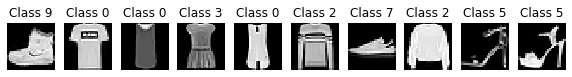

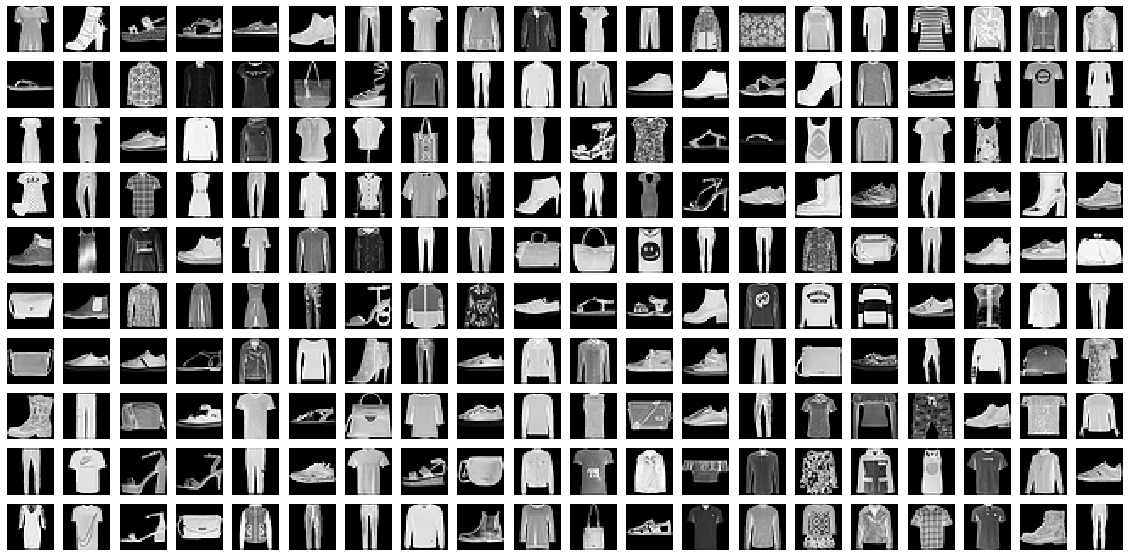

In [ ]:
# Show a few sample clothes from the training set
import matplotlib.pyplot as plt
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

plt.rcParams['figure.figsize'] = (2.5, 2.5) # set default size of plots
col1 = 10
row1 = 1
fig = plt.figure(figsize=(col1, row1))
for index in range(0, col1*row1):
    fig.add_subplot(row1, col1, index + 1)
    plt.axis('off')
    plt.imshow(x_train[index]) # index of the sample picture
    plt.title("Class " + str(y_train[index]))
plt.show()

# Show a few sample clothes from the training set
plt.rcParams['figure.figsize'] = (1.0, 1.0) # set default size of plots
col2 = 20
row2 = 10
fig = plt.figure(figsize=(col2, row2))
for index in range(col1*row1, col1*row1 + col2*row2):
    fig.add_subplot(row2, col2, index - col1*row1 + 1)
    plt.axis('off')
    plt.imshow(x_train[index]) # index of the sample picture
plt.show()

In [ ]:
print(f'X.shape={X.shape}')
img_rows = X.shape[1]
img_cols = X.shape[2]
num_classes = np.max(y)+1

X.shape=(70000, 28, 28)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

Create a CNN model

In [ ]:
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf

tf.random.set_seed(42)

model1 = models.Sequential()
model1.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2],1)))
model1.add(layers.MaxPooling2D((2, 2)))
# Flatten the output to input data to the Dense layer
model1.add(layers.Flatten())
# Dense layers - similar to the previous model, but using the smaller number of units
model1.add(layers.Dense(32, activation='relu'))
model1.add(layers.Dense(num_classes, activation='softmax'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 8)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1352)              0         
                                                                 
 dense_1 (Dense)             (None, 32)                43296     
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 43,706
Trainable params: 43,706
Non-trainable params: 0
__________________________________________________

In [ ]:
model1.compile(optimizer=tf.keras.optimizers.RMSprop(0.02),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
epochs = 20
batch_size = 2048
hist = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_test, y_test))

Epoch 1/20
23/23 [==============================] - 11s 47ms/step - loss: 1.3605 - accuracy: 0.5467 - val_loss: 0.6252 - val_accuracy: 0.7567
Epoch 2/20
23/23 [==============================] - 1s 26ms/step - loss: 0.5656 - accuracy: 0.7878 - val_loss: 0.5367 - val_accuracy: 0.7920
Epoch 3/20
23/23 [==============================] - 1s 25ms/step - loss: 0.5006 - accuracy: 0.8173 - val_loss: 0.6176 - val_accuracy: 0.7608
Epoch 4/20
23/23 [==============================] - 1s 26ms/step - loss: 0.4461 - accuracy: 0.8343 - val_loss: 0.3853 - val_accuracy: 0.8657
Epoch 5/20
23/23 [==============================] - 1s 25ms/step - loss: 0.4042 - accuracy: 0.8507 - val_loss: 0.4128 - val_accuracy: 0.8477
Epoch 6/20
23/23 [==============================] - 1s 27ms/step - loss: 0.3905 - accuracy: 0.8566 - val_loss: 0.3818 - val_accuracy: 0.8566
Epoch 7/20
23/23 [==============================] - 1s 26ms/step - loss: 0.3625 - accuracy: 0.8673 - val_loss: 0.3802 - val_accuracy: 0.8538
Epoch 8/20
2

Compute scores on the validation set

In [ ]:
val_loss1, val_acc1 = model1.evaluate(X_test, y_test)
print('validation accuracy:', val_acc1)
print('validation loss:', val_loss1)

722/722 [==============================] - 3s 4ms/step - loss: 0.3495 - accuracy: 0.8919
validation accuracy: 0.8919047713279724
validation loss: 0.34953057765960693


In [ ]:
pip install seaborn

     -------------------------------------- 292.8/292.8 KB 1.4 MB/s eta 0:00:00
     --------------------------------------- 10.6/10.6 MB 20.5 MB/s eta 0:00:00

     ------------------------------------- 503.5/503.5 KB 30.8 MB/s eta 0:00:00


Display the confusion matrix

The function from the previous classes was split into two functions...

In [13]:
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt


# Define the confusion matrix for the results
def show_confusion_matrix(matrix, labels=None):
    num_classes = matrix.shape[0]
    if labels is None:
      labels = [str(i) for i in range(num_classes)]
    plt.figure(figsize=(num_classes, num_classes))
    hm = sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=labels[0:num_classes],
                yticklabels=labels[0:num_classes],
                annot=True,
                fmt='d')
    plt.yticks(rotation = 0)  # Don't rotate (vertically) the y-axis labels
    # hm.set_ylim(0, len(matrix))
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def compute_and_show_confusion_matrix(validations, predictions, labels=None):
    matrix = metrics.confusion_matrix(validations, predictions)
    show_confusion_matrix(matrix, labels)

In [ ]:
probs = model1.predict(X_test)
y_pred = np.argmax(probs,axis=1)
print(f'y_pred.shape={y_pred.shape}')

y_pred.shape=(23100,)


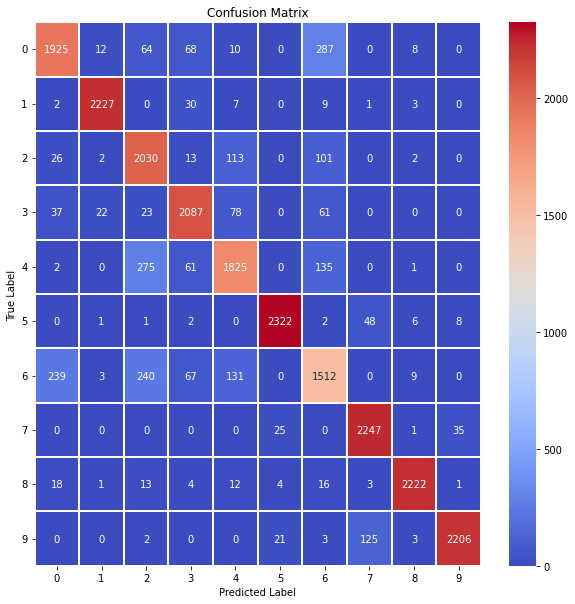

In [ ]:
compute_and_show_confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      2374
           1       0.98      0.98      0.98      2279
           2       0.77      0.89      0.82      2287
           3       0.89      0.90      0.90      2308
           4       0.84      0.79      0.82      2299
           5       0.98      0.97      0.98      2390
           6       0.71      0.69      0.70      2201
           7       0.93      0.97      0.95      2308
           8       0.99      0.97      0.98      2294
           9       0.98      0.93      0.96      2360

    accuracy                           0.89     23100
   macro avg       0.89      0.89      0.89     23100
weighted avg       0.89      0.89      0.89     23100



# 3.3 Wrap it as a function

Digression related to Python technicalities:

*  it is possible to define a function taking as parameter a dictionary mapping keywords to values
*  and call it specifying keywords or passing a dictionary

In [ ]:
def foo(**kwargs):
  print('foo')
  for k in kwargs:
    print(k,kwargs[k])

foo(ala=0,ma=1,kota=2)


foo
ala 0
ma 1
kota 2


In [ ]:
def boo(**kwargs):
  ala = kwargs.get('ala',0)
  ma = kwargs.get('ma',111)
  kota = kwargs.get('kota',222)
  print('boo',ala,ma,kota)

boo(ala=23)

boo(**{'ala':123,'ma':12})

boo 23 111 222
boo 123 12 222


It is up to you what to do with unknown keywords

In [ ]:
def woo(**kwargs):
  keywords = ['ala','ma','kota']
  for k in kwargs:
    if k not in keywords:
      raise ValueError(f'Unknown keyword {k}')
  ala = kwargs.get('ala',0)
  ma = kwargs.get('ma',1)
  kota = kwargs.get('kota',2)
  print('woo',ala,ma,kota)

woo(**{'ala':-1})
try:
  woo(**{'ala':-1,'ola':-2})
except Exception as e:
  print(e)

woo -1 1 2
Unknown keyword ola


## Define a function building a CNN model

**TODO 3.3.1** define at least two other models  and name it using keywords, e.g 'model_1', 'model_2', etc

In [ ]:
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf

def build_model(model_name,input_shape,num_classes,random_state=42):
  tf.random.set_seed(random_state)
  if model_name == 'model_0':
    model = models.Sequential()
    model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model
  elif model_name == 'model_1':
    model = models.Sequential()
    model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model
  elif model_name == 'model_2':
    model = models.Sequential()
    model.add(layers.Conv2D(4, (2, 2), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model
  elif model_name == 'model_1-1':
    model = models.Sequential()
    model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model
  elif model_name == 'model_2-1':
    model = models.Sequential()
    model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model
  elif model_name == 'model_3-1':
    model = models.Sequential()
    model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model
  elif model_name == 'model_4-1':
    model = models.Sequential()
    model.add(layers.Conv2D(4, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.Conv2D(4, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model
  elif model_name == 'model_5-1':
    model = models.Sequential()
    model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model
  elif model_name == 'model_6-1':
    model = models.Sequential()
    model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model
  elif model_name == 'model_7-1':
    model = models.Sequential()
    model.add(layers.Conv2D(16, (4, 4), activation='relu', input_shape=input_shape))
    model.add(layers.Conv2D(16, (4, 4), activation='relu', input_shape=input_shape))
    model.add(layers.Conv2D(16, (4, 4), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model
  else:
    return None


In [ ]:
build_model(model_name = "model_1", input_shape = (X_train.shape[1], X_train.shape[2],1), num_classes = num_classes)
build_model(model_name = "model_2", input_shape = (X_train.shape[1], X_train.shape[2],1), num_classes = num_classes)

## The function that trains a model, tests it and return scores

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def perform_test(X_train,y_train,X_test,y_test, verbose=1,**kwargs):
  model_name = kwargs['model_name']
  epochs = kwargs.get('epochs',20)
  learning_rate = kwargs.get('learning_rate',0.01)
  batch_size = kwargs.get('batch_size',1024)
  random_seed = kwargs.get('random_seed',42)
  returnModel = kwargs.get('returnModel',True)
  
  input_shape = list(X_train.shape[1:])
  input_shape.append(1)
  input_shape=tuple(input_shape)

  num_classes = np.max(y_train)+1
  model = build_model(model_name,input_shape=input_shape,num_classes=num_classes,random_state=random_seed)
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate),
                loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size, verbose=verbose)
  preds = model.predict(X_test)
  y_pred = np.argmax(preds,axis=1)
  print(f'y_pred {y_pred.shape} {y_test.shape}')
  results = {}
  results['confusion_matrix'] = confusion_matrix(y_pred,y_test)
  results['accuracy'] = accuracy_score(y_pred,y_test)
  results['precision'] = precision_score(y_pred,y_test,average='macro')
  results['recall'] = recall_score(y_pred,y_test,average='macro')
  results['f1'] = f1_score(y_pred,y_test,average='macro')
  if returnModel:
    results['model'] = model
  return results


## Configurations
We will define a number of configurations to be tested, Each configuration defines the model name and a number of hyperparameters.


In [ ]:
configurations={'First configuration':{'model_name':'model_1','epochs':20,'learning_rate':0.01,'random_seed':42},
                'Secound configuration':{'model_name':'model_2','epochs':10,'learning_rate':0.01,'random_seed':42}}



**TODO 3.3.2** Call the function perform_test for each configuration, print returned score values and display confusion matrix.

Epoch 1/20
46/46 [==============================] - 2s 24ms/step - loss: 1.1424 - accuracy: 0.6008
Epoch 2/20
46/46 [==============================] - 1s 23ms/step - loss: 0.6011 - accuracy: 0.7734
Epoch 3/20
46/46 [==============================] - 1s 23ms/step - loss: 0.5092 - accuracy: 0.8125
Epoch 4/20
46/46 [==============================] - 1s 24ms/step - loss: 0.4480 - accuracy: 0.8362
Epoch 5/20
46/46 [==============================] - 1s 23ms/step - loss: 0.4074 - accuracy: 0.8497
Epoch 6/20
46/46 [==============================] - 1s 23ms/step - loss: 0.3731 - accuracy: 0.8616
Epoch 7/20
46/46 [==============================] - 1s 23ms/step - loss: 0.3521 - accuracy: 0.8686
Epoch 8/20
46/46 [==============================] - 1s 23ms/step - loss: 0.3343 - accuracy: 0.8737
Epoch 9/20
46/46 [==============================] - 1s 23ms/step - loss: 0.3180 - accuracy: 0.8814
Epoch 10/20
46/46 [==============================] - 1s 24ms/step - loss: 0.3094 - accuracy: 0.8843
Epoch 11/

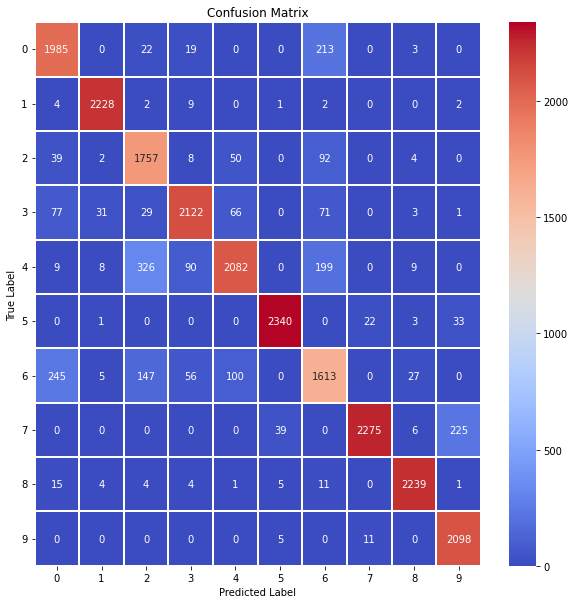

Accuracy:	0.898
Precision:	0.897
Recall:	0.9
F1:	0.897
--- First configuration ---
Epoch 1/10
46/46 [==============================] - 1s 10ms/step - loss: 0.9614 - accuracy: 0.6445
Epoch 2/10
46/46 [==============================] - 0s 11ms/step - loss: 0.5833 - accuracy: 0.7789
Epoch 3/10
46/46 [==============================] - 0s 11ms/step - loss: 0.5035 - accuracy: 0.8130
Epoch 4/10
46/46 [==============================] - 0s 11ms/step - loss: 0.4638 - accuracy: 0.8309
Epoch 5/10
46/46 [==============================] - 0s 10ms/step - loss: 0.4305 - accuracy: 0.8430
Epoch 6/10
46/46 [==============================] - 0s 11ms/step - loss: 0.4161 - accuracy: 0.8493
Epoch 7/10
46/46 [==============================] - 0s 10ms/step - loss: 0.4003 - accuracy: 0.8562
Epoch 8/10
46/46 [==============================] - 0s 10ms/step - loss: 0.3919 - accuracy: 0.8576
Epoch 9/10
46/46 [==============================] - 0s 10ms/step - loss: 0.3800 - accuracy: 0.8629
Epoch 10/10
46/46 [=======

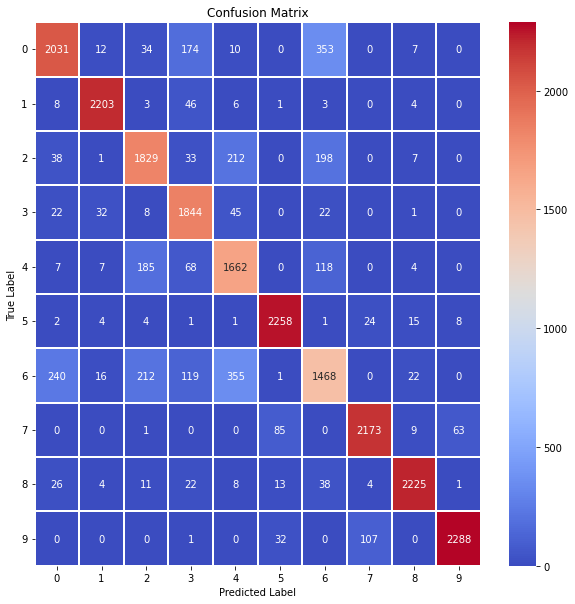

Accuracy:	0.865
Precision:	0.864
Recall:	0.868
F1:	0.864
--- Secound configuration ---


In [ ]:
for cname in configurations:
  results = perform_test(X_train, y_train, X_test, y_test, **configurations[cname])
    # show results
  show_confusion_matrix(results['confusion_matrix'])
  print(f'Accuracy:\t{results["accuracy"]:.3}')
  print(f'Precision:\t{results["precision"]:.3}')
  print(f'Recall:\t{results["recall"]:.3}')
  print(f'F1:\t{results["f1"]:.3}')
  print(f'--- {cname} ---')

**TODO 3.3.3** Prepare 7 (**seven**) configurations adding **at least** two new NN models and perform tests. Try to outperform the results obtained with the sample code.  

Present the results in the form of a table. A table can be entered as a markdown: [see the table generator](https://www.tablesgenerator.com/markdown_tables#). As an alternative, you may load data to Pandas DataFrame and display using df.head(). 

| Configuration         | Model name   | Hiperparameters                   | Accuracy | Precision | Recall | F1   |
|----------------------|---------|----------------------------------|----------|-----------|--------|------|
| First Configuration  | model_0 | epochs=20 learning_rate=0.01 itd | 0.67     | 0.78      | 0.65   | 0.72 |
| First Configuration-1   | model_1-1 | epochs=20 learning_rate=0.01 random_seed=42   | 0.871 | 0.869 | 0.871 | 0.867 |
| Second Configuration-1  | model_2-1 | epochs=20 learning_rate=0.01 random_seed=42   | 0.877 | 0.875 | 0.876 | 0.873 |
| Third Configuration-1   | model_3-1 | epochs=100 learning_rate=0.001 random_seed=42 | 0.904 | 0.903 | 0.902 | 0.901 |
| Fourth Configuration-1  | model_4-1 | epochs=20 learning_rate=0.001 random_seed=42  | 0.832 | 0.829 | 0.828 | 0.824 |
| Fifth Configuration-1   | model_5-1 | epochs=100 learning_rate=0.01 random_seed=42  | 0.897 | 0.896 | 0.897 | 0.894 |
| Sixth Configuration-1   | model_6-1 | epochs=200 learning_rate=0.01 random_seed=42  | 0.857 | 0.856 | 0.862 | 0.857 |
| Seventh Configuration-1 | model_7-1 | epochs=200 learning_rate=0.01 random_seed=42  | 0.873 | 0.871 | 0.873 | 0.872 |

Hiperparameters can be placed in seperate columns...

In [ ]:
build_model(model_name = "model_1-1", input_shape = (X_train.shape[1], X_train.shape[2],1), num_classes = num_classes)
build_model(model_name = "model_2-1", input_shape = (X_train.shape[1], X_train.shape[2],1), num_classes = num_classes)
build_model(model_name = "model_3-1", input_shape = (X_train.shape[1], X_train.shape[2],1), num_classes = num_classes)
build_model(model_name = "model_4-1", input_shape = (X_train.shape[1], X_train.shape[2],1), num_classes = num_classes)
build_model(model_name = "model_5-1", input_shape = (X_train.shape[1], X_train.shape[2],1), num_classes = num_classes)
build_model(model_name = "model_6-1", input_shape = (X_train.shape[1], X_train.shape[2],1), num_classes = num_classes)
build_model(model_name = "model_7-1", input_shape = (X_train.shape[1], X_train.shape[2],1), num_classes = num_classes)

In [ ]:
configurations={'First configuration-1':{'model_name':'model_1-1','epochs':20,'learning_rate':0.01,'random_seed':42},
                'Secound configuration-1':{'model_name':'model_2-1','epochs':20,'learning_rate':0.01,'random_seed':42},
                'Third configuration-1':{'model_name':'model_3-1','epochs':100,'learning_rate':0.001,'random_seed':42},
                'Fourth configuration-1':{'model_name':'model_4-1','epochs':20,'learning_rate':0.001,'random_seed':42},
                'Fifth configuration-1':{'model_name':'model_5-1','epochs':100,'learning_rate':0.01,'random_seed':42},
                'Sixth configuration-1':{'model_name':'model_6-1','epochs':200,'learning_rate':0.01,'random_seed':42},
                'Seventh configuration-1':{'model_name':'model_7-1','epochs':200,'learning_rate':0.01,'random_seed':42}}

y_pred (23100,) (23100,)


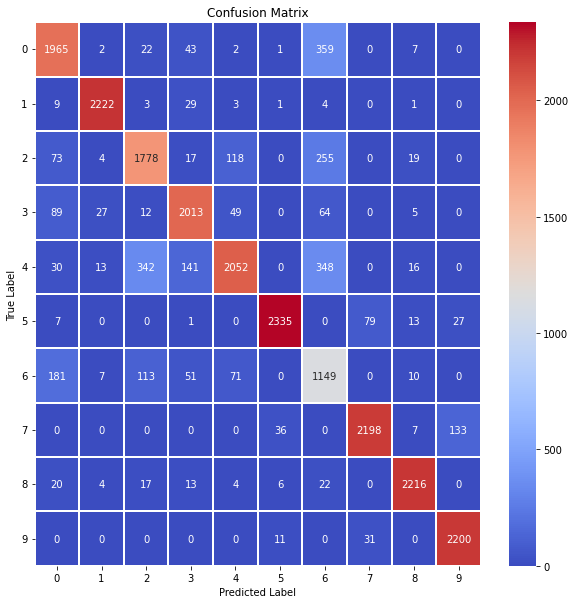

Accuracy:	0.871
Precision:	0.869
Recall:	0.871
F1:	0.867
--- First configuration-1 ---
y_pred (23100,) (23100,)


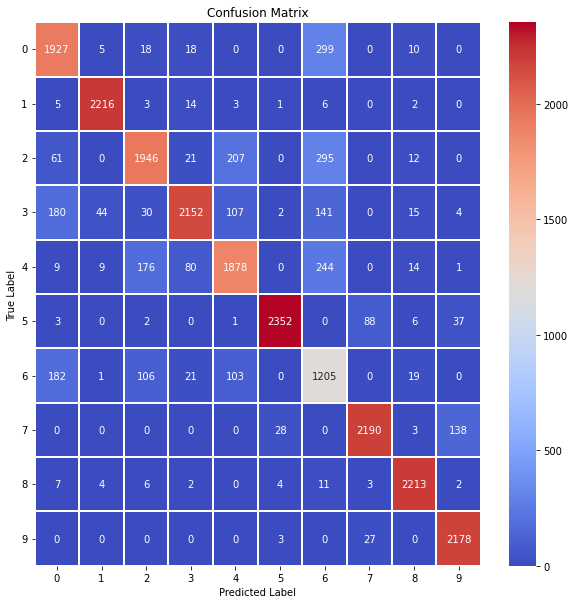

Accuracy:	0.877
Precision:	0.875
Recall:	0.876
F1:	0.873
--- Secound configuration-1 ---
y_pred (23100,) (23100,)


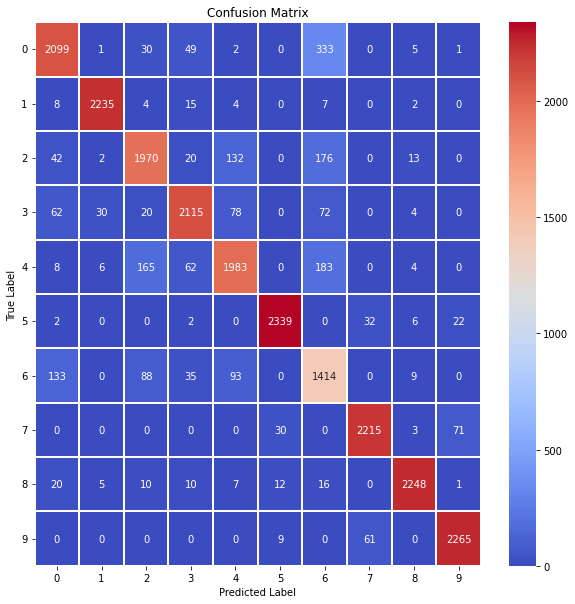

Accuracy:	0.904
Precision:	0.903
Recall:	0.902
F1:	0.901
--- Third configuration-1 ---
y_pred (23100,) (23100,)


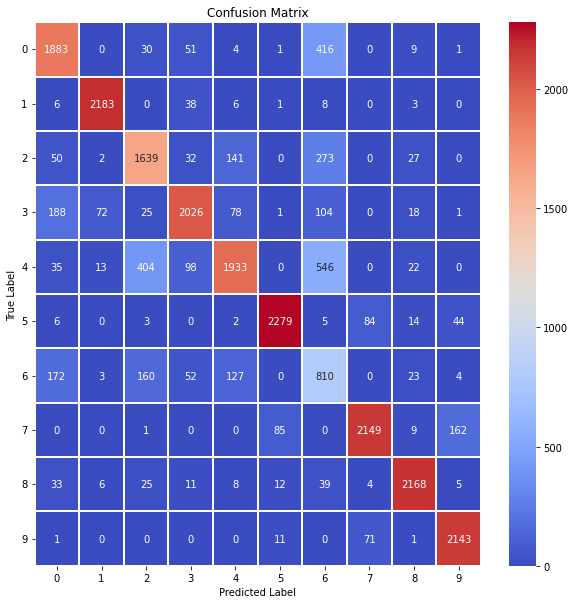

Accuracy:	0.832
Precision:	0.829
Recall:	0.828
F1:	0.824
--- Fourth configuration-1 ---
y_pred (23100,) (23100,)


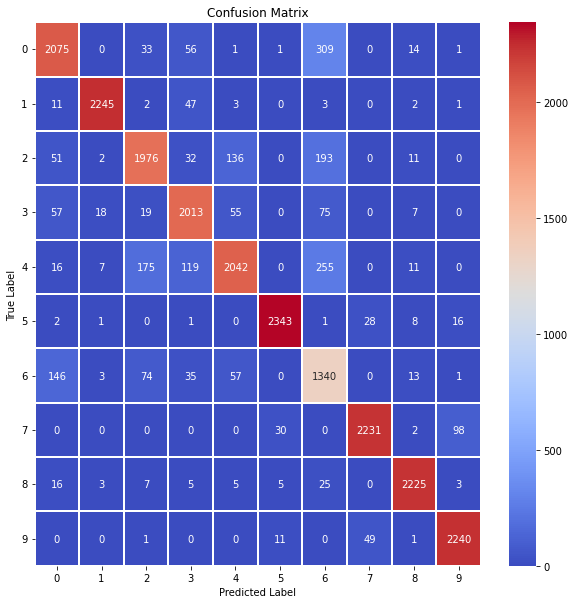

Accuracy:	0.897
Precision:	0.896
Recall:	0.897
F1:	0.894
--- Fifth configuration-1 ---
y_pred (23100,) (23100,)


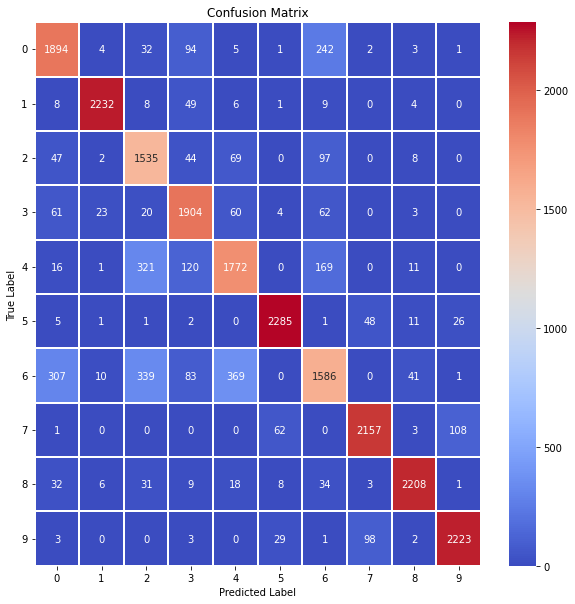

Accuracy:	0.857
Precision:	0.856
Recall:	0.862
F1:	0.857
--- Sixth configuration-1 ---
y_pred (23100,) (23100,)


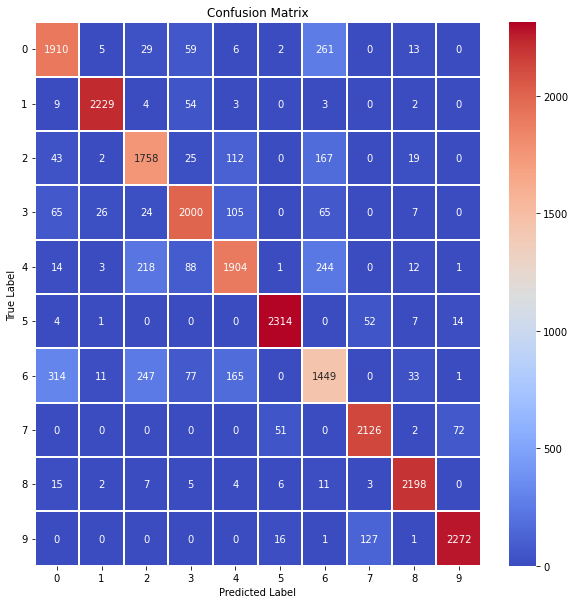

Accuracy:	0.873
Precision:	0.871
Recall:	0.873
F1:	0.872
--- Seventh configuration-1 ---


In [ ]:
for cname in configurations:
  #Without epochs to make pdf shorter
  results = perform_test(X_train, y_train, X_test, y_test, verbose = 0, **configurations[cname])
  show_confusion_matrix(results['confusion_matrix'])
  print(f'Accuracy:\t{results["accuracy"]:.3}')
  print(f'Precision:\t{results["precision"]:.3}')
  print(f'Recall:\t{results["recall"]:.3}')
  print(f'F1:\t{results["f1"]:.3}')
  print(f'--- {cname} ---')

# 3.4 Cross validation

 

In [ ]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

We define a code that uses StratifiedKFold class to perform k-fold cross validation. Stratified - means preserving proportions of strata, i.e. class labels. 

The cross validation will be performed only on the training set. Then the model will be tested on the training set

## Cross validation

In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split

n_splits = 5
random_state =  123
config = configurations['First configuration-1']

cv_results = {}

skf = StratifiedKFold(n_splits=n_splits, shuffle=True,random_state=random_state)
for fold_number, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
  X_train_fold = X_train[train_index]
  y_train_fold = y_train[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train[test_index]

  print(f'============= Fold#{fold_number+1} =============')
  results = perform_test(X_train_fold,y_train_fold,X_test_fold,y_test_fold,**config)
  
  for k in results:
    if k=='model':
      continue 
    rlist=cv_results.get(k,[])
    rlist.append(results[k])
    cv_results[k]=rlist 


============= Fold#1 =============
Epoch 1/20
47/47 [==============================] - 2s 21ms/step - loss: 3.5463 - accuracy: 0.4289
Epoch 2/20
47/47 [==============================] - 1s 14ms/step - loss: 1.0666 - accuracy: 0.6209
Epoch 3/20
47/47 [==============================] - 1s 15ms/step - loss: 0.8171 - accuracy: 0.7045
Epoch 4/20
47/47 [==============================] - 1s 13ms/step - loss: 0.6383 - accuracy: 0.7649
Epoch 5/20
47/47 [==============================] - 1s 11ms/step - loss: 0.6011 - accuracy: 0.7801
Epoch 6/20
47/47 [==============================] - 1s 11ms/step - loss: 0.5334 - accuracy: 0.8030
Epoch 7/20
47/47 [==============================] - 1s 11ms/step - loss: 0.5118 - accuracy: 0.8082
Epoch 8/20
47/47 [==============================] - 1s 11ms/step - loss: 0.4903 - accuracy: 0.8184
Epoch 9/20
47/47 [==============================] - 1s 11ms/step - loss: 0.4684 - accuracy: 0.8267
Epoch 10/20
47/47 [==============================] - 1s 11ms/step - loss: 

**TODO 3.4.1** Process the data from cv_results to display average scores and aggregated confussion matrix. In the provided code sample pandas DataFrame is used, however, it can be achieved in many other ways, e.g. by converting lists to numpy arrays.

In [ ]:
# display results
import pandas as pd

df = pd.DataFrame(cv_results)
df.head()

,confusion_matrix,accuracy,precision,recall,f1
0,"[[1085, 16, 48, 68, 10, 0, 309, 0, 4, 0], [2, ...",0.842917,0.842917,0.848682,0.839938
1,"[[942, 6, 13, 28, 2, 0, 181, 0, 1, 0], [2, 116...",0.856750,0.856750,0.855770,0.855559
2,"[[947, 3, 7, 23, 3, 0, 166, 0, 4, 0], [9, 1164...",0.854750,0.854750,0.854751,0.853375
3,"[[699, 0, 4, 5, 1, 1, 69, 0, 4, 0], [6, 1167, ...",0.841250,0.841250,0.857228,0.841951
4,"[[789, 1, 9, 25, 1, 1, 87, 0, 6, 0], [14, 1167...",0.832833,0.832833,0.844278,0.835204


In [ ]:
# Compute avarage scores
print(f'Avarage Accuracy:\t{np.mean(cv_results["accuracy"]):.3}')
print(f'Avarage Precision:\t{np.mean(cv_results["precision"]):.3}')
print(f'Avarage Recall:\t{np.mean(cv_results["recall"]):.3}')
print(f'Avarage F1:\t{np.mean(cv_results["f1"]):.3}')

Avarage Accuracy:	0.846
Avarage Precision:	0.846
Avarage Recall:	0.852
Avarage F1:	0.845


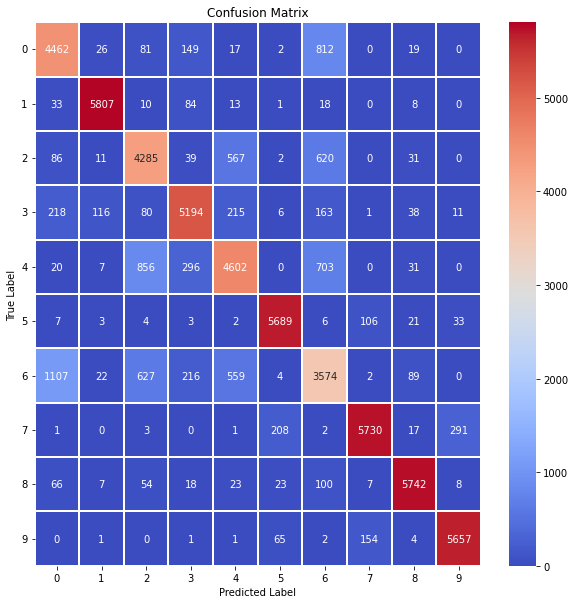

In [ ]:
# Aggregate (i.e. sum) confusion matrices for particular folds and display it
cm = sum(cv_results["confusion_matrix"])
show_confusion_matrix(cm)

**TODO 3.4.2** Perform the above experiments using **three** best configurations (based on train-test procedure. Compare results obtained by testing and cross-validation. 

============= Fold#1 =============
Epoch 1/20
47/47 [==============================] - 1s 17ms/step - loss: 3.5610 - accuracy: 0.5577
Epoch 2/20
47/47 [==============================] - 1s 13ms/step - loss: 0.7761 - accuracy: 0.7196
Epoch 3/20
47/47 [==============================] - 1s 13ms/step - loss: 0.6359 - accuracy: 0.7633
Epoch 4/20
47/47 [==============================] - 1s 13ms/step - loss: 0.5815 - accuracy: 0.7825
Epoch 5/20
47/47 [==============================] - 1s 13ms/step - loss: 0.5684 - accuracy: 0.7908
Epoch 6/20
47/47 [==============================] - 1s 13ms/step - loss: 0.5154 - accuracy: 0.8031
Epoch 7/20
47/47 [==============================] - 1s 14ms/step - loss: 0.4826 - accuracy: 0.8176
Epoch 8/20
47/47 [==============================] - 1s 14ms/step - loss: 0.4825 - accuracy: 0.8174
Epoch 9/20
47/47 [==============================] - 1s 14ms/step - loss: 0.4602 - accuracy: 0.8272
Epoch 10/20
47/47 [==============================] - 1s 13ms/step - loss: 

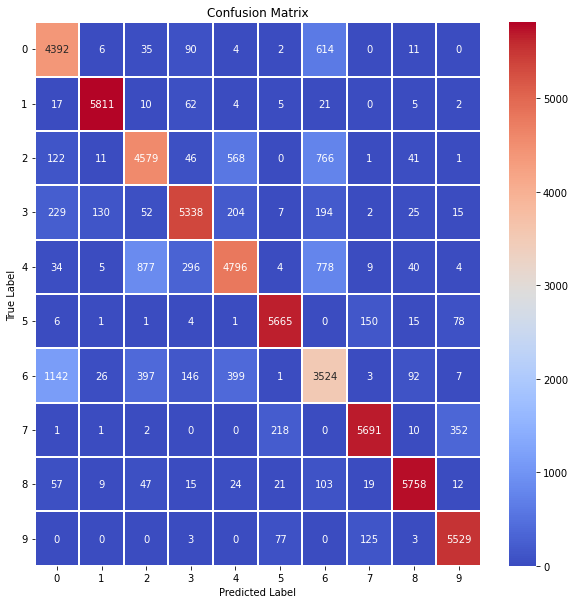

In [ ]:
n_splits = 5
random_state =  123
config = configurations['Secound configuration-1']

cv_results = {}

skf = StratifiedKFold(n_splits=n_splits, shuffle=True,random_state=random_state)
for fold_number, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
  X_train_fold = X_train[train_index]
  y_train_fold = y_train[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train[test_index]

  print(f'============= Fold#{fold_number+1} =============')
  results = perform_test(X_train_fold,y_train_fold,X_test_fold,y_test_fold,**config)
  
  for k in results:
    if k=='model':
      continue 
    rlist=cv_results.get(k,[])
    rlist.append(results[k])
    cv_results[k]=rlist 

# Compute avarage scores
print(f'Avarage Accuracy:\t{np.mean(cv_results["accuracy"]):.3}')
print(f'Avarage Precision:\t{np.mean(cv_results["precision"]):.3}')
print(f'Avarage Recall:\t{np.mean(cv_results["recall"]):.3}')
print(f'Avarage F1:\t{np.mean(cv_results["f1"]):.3}')

# Aggregate (i.e. sum) confusion matrices for particular folds and display it
cm = sum(cv_results["confusion_matrix"])
show_confusion_matrix(cm)

In [ ]:
# display results
df = pd.DataFrame(cv_results)
df.head()

,confusion_matrix,accuracy,precision,recall,f1
0,"[[1010, 1, 7, 35, 1, 0, 179, 0, 5, 0], [3, 116...",0.857917,0.857917,0.858101,0.857246
1,"[[870, 2, 8, 12, 1, 1, 112, 0, 1, 0], [6, 1157...",0.850667,0.850667,0.853228,0.849111
2,"[[963, 2, 13, 22, 1, 0, 164, 0, 3, 0], [1, 115...",0.863500,0.863500,0.863043,0.862164
3,"[[824, 0, 4, 3, 1, 0, 103, 0, 1, 0], [2, 1164,...",0.853333,0.853333,0.856967,0.853283
4,"[[725, 1, 3, 18, 0, 1, 56, 0, 1, 0], [5, 1170,...",0.831500,0.831500,0.843473,0.833177


============= Fold#1 =============
y_pred (12000,) (12000,)
============= Fold#2 =============
y_pred (12000,) (12000,)
============= Fold#3 =============
y_pred (12000,) (12000,)
============= Fold#4 =============
y_pred (12000,) (12000,)
============= Fold#5 =============
y_pred (12000,) (12000,)
Avarage Accuracy:	0.884
Avarage Precision:	0.884
Avarage Recall:	0.884
Avarage F1:	0.883


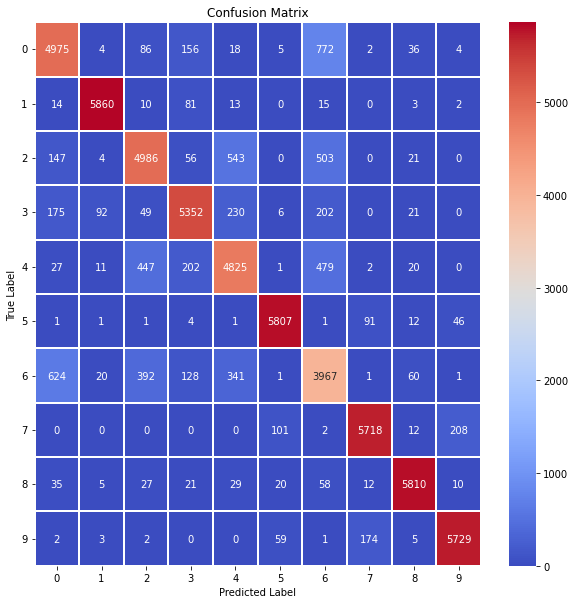

In [ ]:
n_splits = 5
random_state =  123
config = configurations['Third configuration-1']

cv_results_win = {}

skf = StratifiedKFold(n_splits=n_splits, shuffle=True,random_state=random_state)
for fold_number, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
  X_train_fold = X_train[train_index]
  y_train_fold = y_train[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train[test_index]

  print(f'============= Fold#{fold_number+1} =============')
  #without showing epochs
  results_win = perform_test(X_train_fold,y_train_fold,X_test_fold,y_test_fold,verbose = 0,**config)
  
  for k in results_win:
    if k=='model':
      continue 
    rlist=cv_results_win.get(k,[])
    rlist.append(results_win[k])
    cv_results_win[k]=rlist 

# Compute avarage scores
print(f'Avarage Accuracy:\t{np.mean(cv_results_win["accuracy"]):.3}')
print(f'Avarage Precision:\t{np.mean(cv_results_win["precision"]):.3}')
print(f'Avarage Recall:\t{np.mean(cv_results_win["recall"]):.3}')
print(f'Avarage F1:\t{np.mean(cv_results_win["f1"]):.3}')

# Aggregate (i.e. sum) confusion matrices for particular folds and display it
cm = sum(cv_results_win["confusion_matrix"])
show_confusion_matrix(cm)

In [ ]:
# display results
df = pd.DataFrame(cv_results_win)
df.head()

,confusion_matrix,accuracy,precision,recall,f1
0,"[[1043, 2, 22, 31, 8, 2, 175, 0, 6, 1], [1, 11...",0.886083,0.886083,0.885504,0.884763
1,"[[968, 1, 9, 28, 1, 1, 136, 0, 6, 0], [5, 1171...",0.882917,0.882917,0.882972,0.882574
2,"[[1028, 1, 20, 29, 0, 1, 179, 1, 5, 0], [4, 11...",0.886417,0.886417,0.885379,0.884724
3,"[[947, 0, 23, 32, 5, 0, 135, 0, 10, 2], [2, 11...",0.876167,0.876167,0.878839,0.876721
4,"[[989, 0, 12, 36, 4, 1, 147, 1, 9, 1], [2, 118...",0.887500,0.887500,0.887395,0.887167


============= Fold#1 =============
y_pred (12000,) (12000,)
============= Fold#2 =============
y_pred (12000,) (12000,)
============= Fold#3 =============
y_pred (12000,) (12000,)
============= Fold#4 =============
y_pred (12000,) (12000,)
============= Fold#5 =============
y_pred (12000,) (12000,)
Avarage Accuracy:	0.865
Avarage Precision:	0.865
Avarage Recall:	0.869
Avarage F1:	0.864


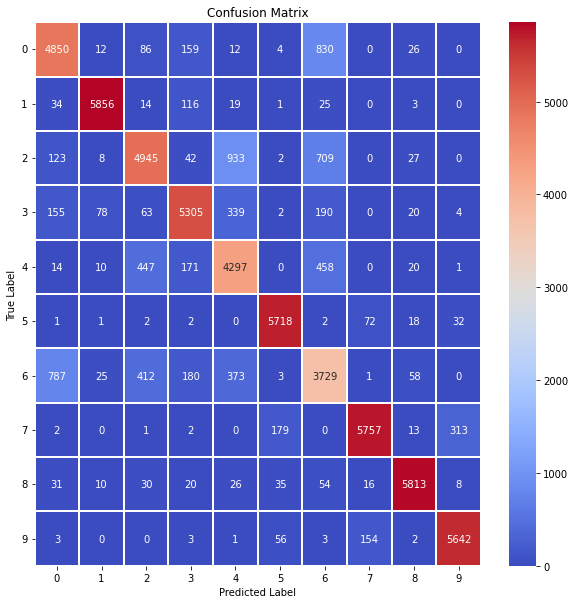

In [ ]:
n_splits = 5
random_state =  123
config = configurations['Fifth configuration-1']

cv_results = {}

skf = StratifiedKFold(n_splits=n_splits, shuffle=True,random_state=random_state)
for fold_number, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
  X_train_fold = X_train[train_index]
  y_train_fold = y_train[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train[test_index]

  print(f'============= Fold#{fold_number+1} =============')
  #without showing epochs
  results = perform_test(X_train_fold,y_train_fold,X_test_fold,y_test_fold,verbose = 0,**config)
  
  for k in results:
    if k=='model':
      continue 
    rlist=cv_results.get(k,[])
    rlist.append(results[k])
    cv_results[k]=rlist 

# Compute avarage scores
print(f'Avarage Accuracy:\t{np.mean(cv_results["accuracy"]):.3}')
print(f'Avarage Precision:\t{np.mean(cv_results["precision"]):.3}')
print(f'Avarage Recall:\t{np.mean(cv_results["recall"]):.3}')
print(f'Avarage F1:\t{np.mean(cv_results["f1"]):.3}')

# Aggregate (i.e. sum) confusion matrices for particular folds and display it
cm = sum(cv_results["confusion_matrix"])
show_confusion_matrix(cm)

In [ ]:
# display results
df = pd.DataFrame(cv_results)
df.head()

,confusion_matrix,accuracy,precision,recall,f1
0,"[[1102, 3, 34, 47, 4, 0, 263, 0, 8, 0], [0, 11...",0.872250,0.872250,0.872757,0.868950
1,"[[995, 3, 11, 27, 2, 1, 213, 0, 4, 0], [6, 116...",0.867583,0.867583,0.866247,0.864757
2,"[[1019, 2, 21, 26, 2, 2, 190, 0, 6, 0], [10, 1...",0.870167,0.870167,0.870949,0.867603
3,"[[916, 2, 13, 35, 2, 1, 109, 0, 3, 0], [5, 116...",0.870000,0.870000,0.874657,0.871132
4,"[[818, 2, 7, 24, 2, 0, 55, 0, 5, 0], [13, 1179...",0.846000,0.846000,0.858292,0.847256


## Testing the winning model

**TODO 3.4.3** Build a model using the winnining configuration (according to CV) and perform the final test on the delivered test set (X_test,y_test). 





In [ ]:
# test based on training data
config = configurations['Third configuration-1']
results = perform_test(X_test,y_test,X_test,y_test,**config)

Epoch 1/100
10/10 [==============================] - 1s 48ms/step - loss: 16.9548 - accuracy: 0.2500
Epoch 2/100
10/10 [==============================] - 0s 25ms/step - loss: 4.6951 - accuracy: 0.4367
Epoch 3/100
10/10 [==============================] - 0s 23ms/step - loss: 3.0097 - accuracy: 0.5447
Epoch 4/100
10/10 [==============================] - 0s 23ms/step - loss: 2.3136 - accuracy: 0.6017
Epoch 5/100
10/10 [==============================] - 0s 22ms/step - loss: 1.7602 - accuracy: 0.6375
Epoch 6/100
10/10 [==============================] - 0s 23ms/step - loss: 1.4770 - accuracy: 0.6602
Epoch 7/100
10/10 [==============================] - 0s 23ms/step - loss: 1.2130 - accuracy: 0.6844
Epoch 8/100
10/10 [==============================] - 0s 22ms/step - loss: 1.0416 - accuracy: 0.7042
Epoch 9/100
10/10 [==============================] - 0s 23ms/step - loss: 0.9105 - accuracy: 0.7236
Epoch 10/100
10/10 [==============================] - 0s 23ms/step - loss: 0.8346 - accuracy: 0.739

Print results

In [ ]:
for k in results:
  if k == 'confusion_matrix' or k=='model':
    continue
  print(f'Accuracy:\t{results["accuracy"]:.3}')
  print(f'Precision:\t{results["precision"]:.3}')
  print(f'Recall:\t{results["recall"]:.3}')
  print(f'F1:\t{results["f1"]:.3}')

Accuracy:	0.939
Precision:	0.939
Recall:	0.943
F1:	0.94
Accuracy:	0.939
Precision:	0.939
Recall:	0.943
F1:	0.94
Accuracy:	0.939
Precision:	0.939
Recall:	0.943
F1:	0.94
Accuracy:	0.939
Precision:	0.939
Recall:	0.943
F1:	0.94


Display the confusion matrix

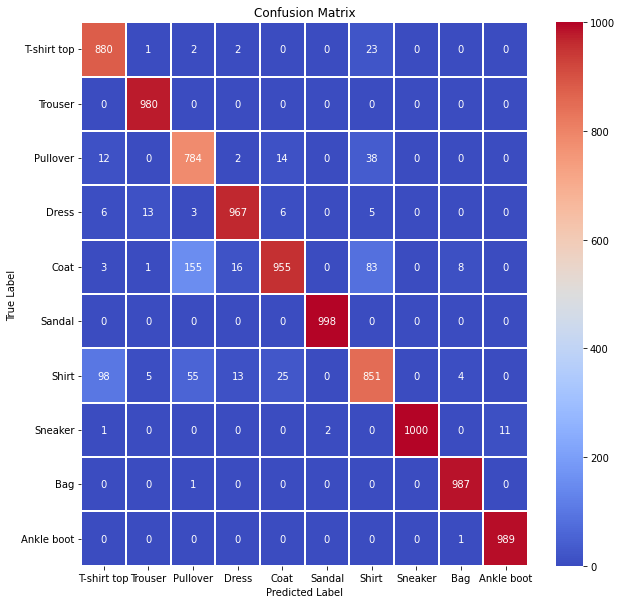

In [ ]:
labels = ['T-shirt top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
show_confusion_matrix(results['confusion_matrix'],labels)

# 3.5 Cifar dataset

We will process Cifar dataset using a resource demanding CNN model.  

In [1]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 7s 0us/step


In [2]:
print(X_train.shape)

(50000, 32, 32, 3)


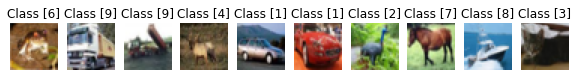

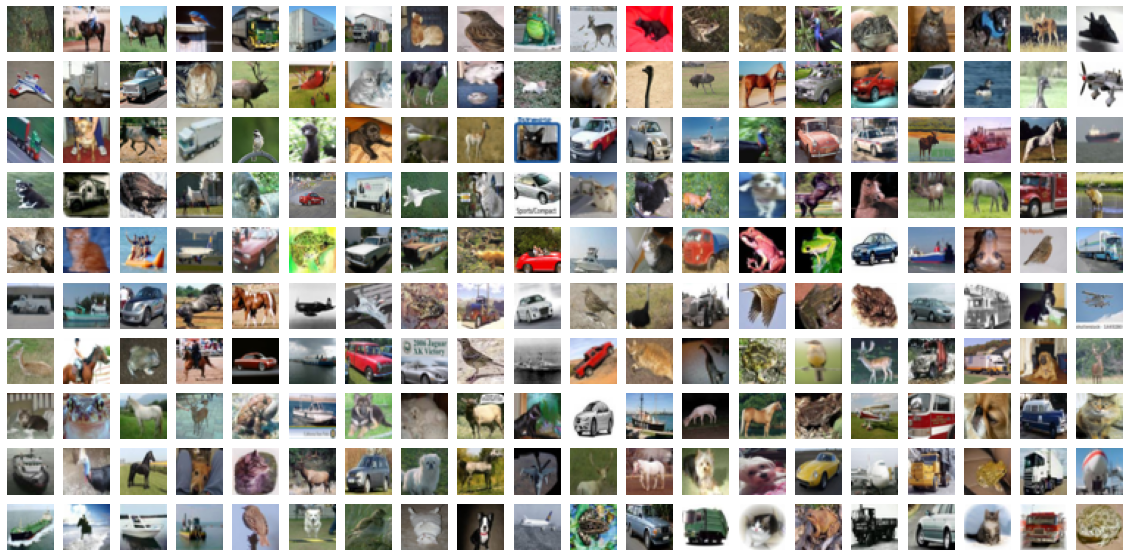

In [3]:
# Show a few sample images from the training set
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (2.5, 2.5) # set default size of plots
col1 = 10
row1 = 1
fig = plt.figure(figsize=(col1, row1))
for index in range(0, col1*row1):
    fig.add_subplot(row1, col1, index + 1)
    plt.axis('off')
    plt.imshow(X_train[index]) # index of the sample picture
    plt.title("Class " + str(y_train[index]))
plt.show()
    
# Show a few sample digits from the training set
plt.rcParams['figure.figsize'] = (1.0, 1.0) # set default size of plots
col2 = 20
row2 = 10
fig = plt.figure(figsize=(col2, row2))
for index in range(col1*row1, col1*row1 + col2*row2):
    fig.add_subplot(row2, col2, index - col1*row1 + 1)
    plt.axis('off')
    plt.imshow(X_train[index]) # index of the sample picture
plt.show()

Some basic preprocessing and calculation of the input shape

In [4]:
X_train = X_train.astype('float32')   # Copy this array and cast it to a specified type
X_test = X_test.astype('float32')     # Copy this array and cast it to a specified type
X_train /= 255 # Transfrom the training data from the range of 0 and 255 to the range of 0 and 1
X_test /= 255  # Transfrom the validating data from the range of 0 and 255 to the range of 0 and 1
input_shape = X_train.shape[1:]
print(f'input shape={input_shape}')

input shape=(32, 32, 3)


Definition of CNN model

In [5]:
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers


num_classes = y_train.max()+1

# Define the sequential Keras model composed of a few layers
model3 = Sequential()   # establishes the type of the network model
# Conv2D - creates a convolutional layer (https://keras.io/layers/convolutional/#conv2d) with 
# filters - specified number of convolutional filters
# kernel_size - defines the frame (sliding window) size where the convolutional filter is implemented
# activation - sets the activation function for this layers, here ReLU
# input_shape - defines the shape of the input matrix (vector), here input_shape = (1, img_rows, img_cols)
model3.add(Conv2D(64, kernel_size=(3, 3),activation='relu', input_shape=input_shape))
model3.add(Conv2D(64, (3, 3), activation='relu'))
# MaxPooling2D pools the max value from the frame (sliding window) of 2 x 2 size
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25)) # Implements the drop out with the probability of 0.25
model3.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
#model3.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.35))
model3.add(Conv2D(256, (3, 3), activation='relu',padding='same'))
#model3.add(Conv2D(256, (3, 3), activation='relu',padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.35))
# Finish the convolutional model and flatten the layer which does not affect the batch size.
model3.add(Flatten())
# Use a dense layer (MLP) consisting of 256 neurons with relu activation functions
model3.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model3.add(Dropout(0.5))
model3.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model3.add(Dropout(0.3))
model3.add(Dense(num_classes, activation='softmax'))

# Now print the full model and notice the number of all trainable paramters
print(model3.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                    

As the number of parameters is high, training the model requires a few dozen of epochs. As an epoch may last as long as 160 sec, the training  phase may last over 2 hours

To accelerate a bit and make the whole process reliable:
*  We will train a model on a subsample of the training set and we will check scores
*  Then we will train using the full training set, in a few increments 
*  Models will be saved to be restored in the case of the seession crach

## Subsampling
We will use only 10% of data for training

In [6]:
import numpy as np

probs = np.random.rand(y_train.shape[0])

X_train_sample = X_train[probs<0.1]
y_train_sample =y_train[probs<0.1]

print(X_train_sample.shape)

(4939, 32, 32, 3)


## Model preparation

In [7]:
# from tensorflow import keras
from keras import optimizers
# dir(optimizers)
optimizer = optimizers.adam_v2.Adam(learning_rate=0.001)
model3.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,metrics=['accuracy'])

In [8]:
import os
#os.mkdir('models')
#File exists

## Training

In [ ]:
batch_size = 512 
epochs = 50

for i in range(10):
  print(f'--- Increment {i} on a subsampled dataset ---')
  results = model3.fit(X_train_sample, y_train_sample,batch_size=batch_size,epochs=epochs//10,verbose=1)
  path=f'models/CNN_CIFAR-10_sub{i}.h5'
  model3.save(path)

--- Increment 0 on a subsampled dataset ---
Epoch 1/5
10/10 [==============================] - 10s 835ms/step - loss: 3.3822 - accuracy: 0.1060
Epoch 2/5
10/10 [==============================] - 9s 884ms/step - loss: 3.0657 - accuracy: 0.1194
Epoch 3/5
10/10 [==============================] - 8s 835ms/step - loss: 2.7861 - accuracy: 0.1857
Epoch 4/5
10/10 [==============================] - 9s 955ms/step - loss: 2.5913 - accuracy: 0.2019
Epoch 5/5
10/10 [==============================] - 8s 827ms/step - loss: 2.3775 - accuracy: 0.2291
--- Increment 1 on a subsampled dataset ---
Epoch 1/5
10/10 [==============================] - 9s 925ms/step - loss: 2.2184 - accuracy: 0.2671
Epoch 2/5
10/10 [==============================] - 9s 913ms/step - loss: 2.0937 - accuracy: 0.2883
Epoch 3/5
10/10 [==============================] - 8s 815ms/step - loss: 2.0025 - accuracy: 0.3151
Epoch 4/5
10/10 [==============================] - 8s 831ms/step - loss: 1.9306 - accuracy: 0.3247
Epoch 5/5
10/10 [===

## Validation on the test set

**TODO 3.5.1** Display scores and the confussion matrix

Accuracy:	0.7881
Precision:	0.791
Recall:	0.788
F1:	0.787


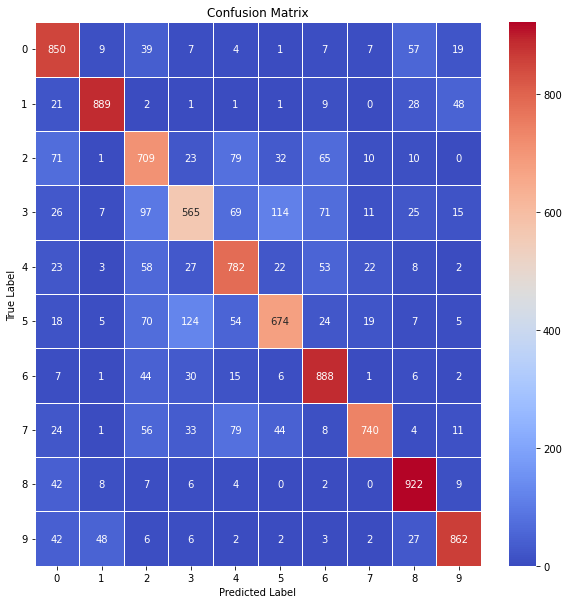

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

preds = model3.predict(X_test)
y_pred = np.argmax(preds,axis=1)

# print scores
print(f'Accuracy:\t{accuracy_score(y_test, y_pred)}')
print(f'Precision:\t{precision_score(y_test, y_pred,average="macro"):.3}')
print(f'Recall:\t{recall_score(y_test, y_pred,average="macro"):.3}')
print(f'F1:\t{f1_score(y_test, y_pred,average="macro"):.3}')

# display confusion matrix
show_confusion_matrix(confusion_matrix(y_test, y_pred))

## Continue training on the whole dataset

In [ ]:
i=i+1
print(f'--- Increment {i} on a full dataset ---')
model3.fit(X_train, y_train,batch_size=batch_size,epochs=10,verbose=1)
path=f'models/CNN_CIFAR-10_full{i}.h5'
model3.save(path)

--- Increment 10 on a full dataset ---
Epoch 1/10
98/98 [==============================] - 83s 847ms/step - loss: 1.2952 - accuracy: 0.6296
Epoch 2/10
98/98 [==============================] - 82s 840ms/step - loss: 1.1413 - accuracy: 0.6684
Epoch 3/10
98/98 [==============================] - 82s 838ms/step - loss: 1.0611 - accuracy: 0.6927
Epoch 4/10
98/98 [==============================] - 82s 836ms/step - loss: 1.0261 - accuracy: 0.7037
Epoch 5/10
98/98 [==============================] - 84s 856ms/step - loss: 0.9738 - accuracy: 0.7252
Epoch 6/10
98/98 [==============================] - 84s 852ms/step - loss: 0.9487 - accuracy: 0.7303
Epoch 7/10
98/98 [==============================] - 85s 866ms/step - loss: 0.9105 - accuracy: 0.7448
Epoch 8/10
98/98 [==============================] - 83s 843ms/step - loss: 0.8944 - accuracy: 0.7539
Epoch 9/10
98/98 [==============================] - 82s 841ms/step - loss: 0.8795 - accuracy: 0.7562
Epoch 10/10
98/98 [==============================] -

**TODO 3.5.2** Print scores and display confusion matrix

Accuracy:	0.7881
Precision:	0.791
Recall:	0.788
F1:	0.787


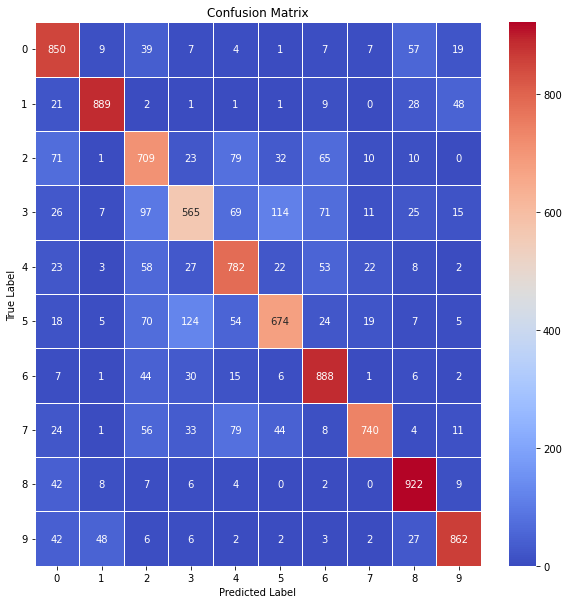

In [ ]:
preds = model3.predict(X_test)
y_pred = np.argmax(preds,axis=1)

# print scores
print(f'Accuracy:\t{accuracy_score(y_test, y_pred)}')
print(f'Precision:\t{precision_score(y_test, y_pred,average="macro"):.3}')
print(f'Recall:\t{recall_score(y_test, y_pred,average="macro"):.3}')
print(f'F1:\t{f1_score(y_test, y_pred,average="macro"):.3}')

# display confusion matrix
show_confusion_matrix(confusion_matrix(y_test, y_pred))

**TODO 3.5.3** Repeat the two above steps (training the model and testing) until satisfying results are reached. You may consider writing a loop, which terminates upon certain conditions, e.g. no improvement or reaching a desired score value

In [ ]:
i=i+1
print(f'--- Increment {i} on a full dataset ---')
model3.fit(X_train, y_train,batch_size=batch_size,epochs=30,verbose=1)
path=f'models/CNN_CIFAR-10_full{i}.h5'
model3.save(path)

--- Increment 11 on a full dataset ---
Epoch 1/30
98/98 [==============================] - 81s 831ms/step - loss: 0.8418 - accuracy: 0.7720
Epoch 2/30
98/98 [==============================] - 82s 833ms/step - loss: 0.8228 - accuracy: 0.7790
Epoch 3/30
98/98 [==============================] - 82s 833ms/step - loss: 0.8165 - accuracy: 0.7792
Epoch 4/30
98/98 [==============================] - 82s 839ms/step - loss: 0.8050 - accuracy: 0.7836
Epoch 5/30
98/98 [==============================] - 82s 834ms/step - loss: 0.7887 - accuracy: 0.7907
Epoch 6/30
98/98 [==============================] - 84s 854ms/step - loss: 0.7756 - accuracy: 0.7982
Epoch 7/30
98/98 [==============================] - 82s 836ms/step - loss: 0.7688 - accuracy: 0.7984
Epoch 8/30
98/98 [==============================] - 82s 841ms/step - loss: 0.7540 - accuracy: 0.8045
Epoch 9/30
98/98 [==============================] - 85s 865ms/step - loss: 0.7510 - accuracy: 0.8071
Epoch 10/30
98/98 [==============================] -

Accuracy:	0.8345
Precision:	0.836
Recall:	0.835
F1:	0.834


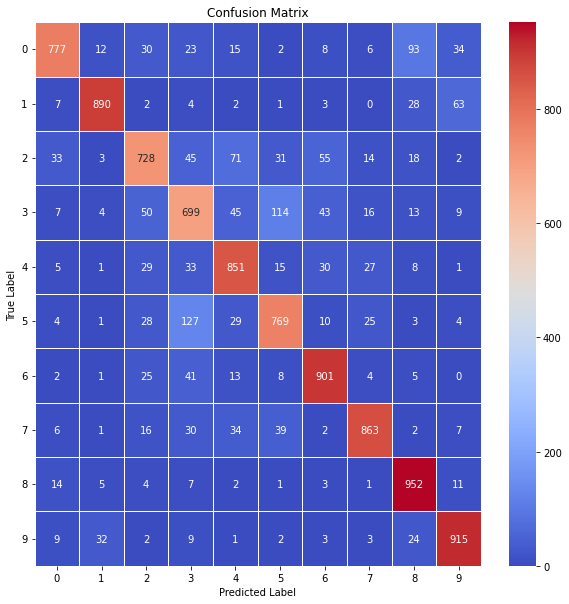

In [ ]:
preds = model3.predict(X_test)
y_pred = np.argmax(preds,axis=1)

# print scores
print(f'Accuracy:\t{accuracy_score(y_test, y_pred)}')
print(f'Precision:\t{precision_score(y_test, y_pred,average="macro"):.3}')
print(f'Recall:\t{recall_score(y_test, y_pred,average="macro"):.3}')
print(f'F1:\t{f1_score(y_test, y_pred,average="macro"):.3}')

# display confusion matrix
show_confusion_matrix(confusion_matrix(y_test, y_pred))

**TODO 3.5.4** Perform an experiment, during which models are trained using:
*  10% of data (done)
*  25% of data 
*  50% of data
*  75% of data
*  100% of data (done)

Display plots showing differences between the classification scores

In [9]:
import numpy as np
#25%
probs = np.random.rand(y_train.shape[0])

X_train_sample = X_train[probs<0.25]
y_train_sample =y_train[probs<0.25]

print(X_train_sample.shape)

(12500, 32, 32, 3)


In [10]:
# from tensorflow import keras
from keras import optimizers
# dir(optimizers)
optimizer = optimizers.adam_v2.Adam(learning_rate=0.001)
model3.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,metrics=['accuracy'])

In [11]:
batch_size = 512 
epochs = 50

for i in range(10):
  print(f'--- Increment {i} on a subsampled dataset ---')
  results = model3.fit(X_train_sample, y_train_sample,batch_size=batch_size,epochs=epochs//10,verbose=1)
  path=f'models/CNN_CIFAR-10_sub{i}.h5'
  model3.save(path)

--- Increment 0 on a subsampled dataset ---
Epoch 1/5
25/25 [==============================] - 15s 124ms/step - loss: 3.0713 - accuracy: 0.1592
Epoch 2/5
25/25 [==============================] - 3s 105ms/step - loss: 2.4594 - accuracy: 0.2318
Epoch 3/5
25/25 [==============================] - 3s 105ms/step - loss: 2.1449 - accuracy: 0.2973
Epoch 4/5
25/25 [==============================] - 3s 111ms/step - loss: 1.9270 - accuracy: 0.3588
Epoch 5/5
25/25 [==============================] - 3s 108ms/step - loss: 1.8195 - accuracy: 0.3902
--- Increment 1 on a subsampled dataset ---
Epoch 1/5
25/25 [==============================] - 3s 107ms/step - loss: 1.7254 - accuracy: 0.4233
Epoch 2/5
25/25 [==============================] - 3s 106ms/step - loss: 1.6327 - accuracy: 0.4478
Epoch 3/5
25/25 [==============================] - 3s 106ms/step - loss: 1.5904 - accuracy: 0.4801
Epoch 4/5
25/25 [==============================] - 3s 106ms/step - loss: 1.5203 - accuracy: 0.5000
Epoch 5/5
25/25 [===

Accuracy:	0.7554
Precision:	0.756
Recall:	0.755
F1:	0.753


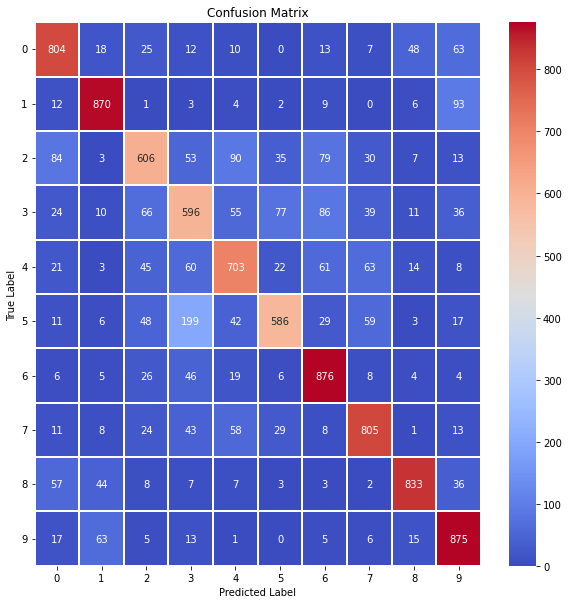

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

preds = model3.predict(X_test)
y_pred = np.argmax(preds,axis=1)

# print scores
print(f'Accuracy:\t{accuracy_score(y_test, y_pred)}')
print(f'Precision:\t{precision_score(y_test, y_pred,average="macro"):.3}')
print(f'Recall:\t{recall_score(y_test, y_pred,average="macro"):.3}')
print(f'F1:\t{f1_score(y_test, y_pred,average="macro"):.3}')

# display confusion matrix
show_confusion_matrix(confusion_matrix(y_test, y_pred))

In [15]:
import numpy as np
#50%
probs = np.random.rand(y_train.shape[0])

X_train_sample = X_train[probs<0.5]
y_train_sample =y_train[probs<0.5]

print(X_train_sample.shape)

(24933, 32, 32, 3)


In [16]:
# from tensorflow import keras
from keras import optimizers
# dir(optimizers)
optimizer = optimizers.adam_v2.Adam(learning_rate=0.001)
model3.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,metrics=['accuracy'])

In [17]:
batch_size = 512 
epochs = 50

for i in range(10):
  print(f'--- Increment {i} on a subsampled dataset ---')
  results = model3.fit(X_train_sample, y_train_sample,batch_size=batch_size,epochs=epochs//10,verbose=1)
  path=f'models/CNN_CIFAR-10_sub{i}.h5'
  model3.save(path)

--- Increment 0 on a subsampled dataset ---
Epoch 1/5
49/49 [==============================] - 7s 123ms/step - loss: 1.0595 - accuracy: 0.7152
Epoch 2/5
49/49 [==============================] - 5s 108ms/step - loss: 0.9246 - accuracy: 0.7579
Epoch 3/5
49/49 [==============================] - 5s 108ms/step - loss: 0.8955 - accuracy: 0.7586
Epoch 4/5
49/49 [==============================] - 5s 108ms/step - loss: 0.8614 - accuracy: 0.7696
Epoch 5/5
49/49 [==============================] - 5s 110ms/step - loss: 0.8370 - accuracy: 0.7758
--- Increment 1 on a subsampled dataset ---
Epoch 1/5
49/49 [==============================] - 5s 109ms/step - loss: 0.8194 - accuracy: 0.7796
Epoch 2/5
49/49 [==============================] - 5s 108ms/step - loss: 0.8057 - accuracy: 0.7892
Epoch 3/5
49/49 [==============================] - 5s 108ms/step - loss: 0.7911 - accuracy: 0.7920
Epoch 4/5
49/49 [==============================] - 5s 109ms/step - loss: 0.7733 - accuracy: 0.7976
Epoch 5/5
49/49 [====

Accuracy:	0.818
Precision:	0.818
Recall:	0.818
F1:	0.818


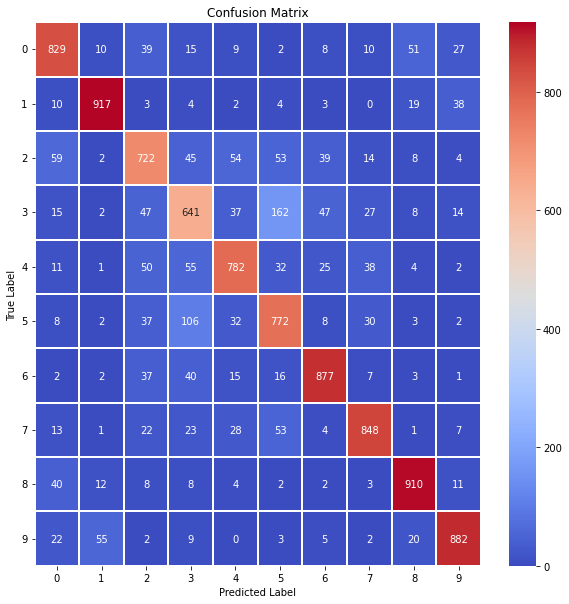

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

preds = model3.predict(X_test)
y_pred = np.argmax(preds,axis=1)

# print scores
print(f'Accuracy:\t{accuracy_score(y_test, y_pred)}')
print(f'Precision:\t{precision_score(y_test, y_pred,average="macro"):.3}')
print(f'Recall:\t{recall_score(y_test, y_pred,average="macro"):.3}')
print(f'F1:\t{f1_score(y_test, y_pred,average="macro"):.3}')

# display confusion matrix
show_confusion_matrix(confusion_matrix(y_test, y_pred))

In [19]:
import numpy as np
#75%
probs = np.random.rand(y_train.shape[0])

X_train_sample = X_train[probs<0.75]
y_train_sample =y_train[probs<0.75]

print(X_train_sample.shape)

(37544, 32, 32, 3)


In [20]:
# from tensorflow import keras
from keras import optimizers
# dir(optimizers)
optimizer = optimizers.adam_v2.Adam(learning_rate=0.001)
model3.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,metrics=['accuracy'])

In [21]:
batch_size = 512 
epochs = 50

for i in range(10):
  print(f'--- Increment {i} on a subsampled dataset ---')
  results = model3.fit(X_train_sample, y_train_sample,batch_size=batch_size,epochs=epochs//10,verbose=1)
  path=f'models/CNN_CIFAR-10_sub{i}.h5'
  model3.save(path)

--- Increment 0 on a subsampled dataset ---
Epoch 1/5
74/74 [==============================] - 9s 115ms/step - loss: 0.7885 - accuracy: 0.8106
Epoch 2/5
74/74 [==============================] - 8s 108ms/step - loss: 0.7341 - accuracy: 0.8229
Epoch 3/5
74/74 [==============================] - 8s 108ms/step - loss: 0.7140 - accuracy: 0.8266
Epoch 4/5
74/74 [==============================] - 8s 108ms/step - loss: 0.6924 - accuracy: 0.8350
Epoch 5/5
74/74 [==============================] - 8s 108ms/step - loss: 0.6952 - accuracy: 0.8323
--- Increment 1 on a subsampled dataset ---
Epoch 1/5
74/74 [==============================] - 8s 107ms/step - loss: 0.6752 - accuracy: 0.8387
Epoch 2/5
74/74 [==============================] - 8s 108ms/step - loss: 0.6809 - accuracy: 0.8353
Epoch 3/5
74/74 [==============================] - 8s 108ms/step - loss: 0.6667 - accuracy: 0.8419
Epoch 4/5
74/74 [==============================] - 8s 107ms/step - loss: 0.6652 - accuracy: 0.8431
Epoch 5/5
74/74 [====

Accuracy:	0.8407
Precision:	0.842
Recall:	0.841
F1:	0.84


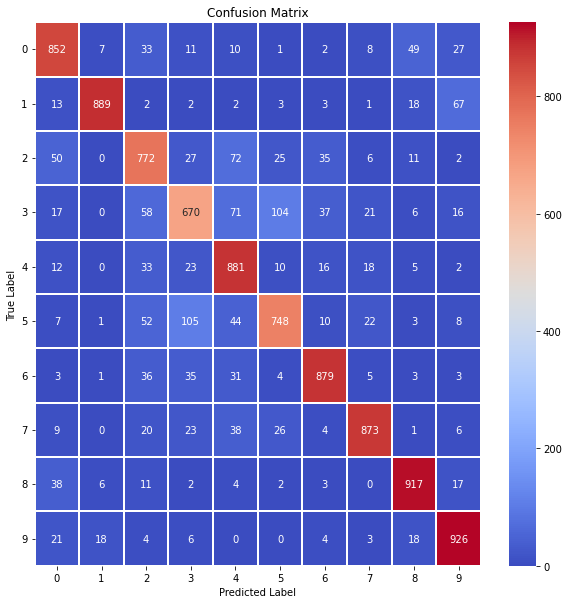

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

preds = model3.predict(X_test)
y_pred = np.argmax(preds,axis=1)

# print scores
print(f'Accuracy:\t{accuracy_score(y_test, y_pred)}')
print(f'Precision:\t{precision_score(y_test, y_pred,average="macro"):.3}')
print(f'Recall:\t{recall_score(y_test, y_pred,average="macro"):.3}')
print(f'F1:\t{f1_score(y_test, y_pred,average="macro"):.3}')

# display confusion matrix
show_confusion_matrix(confusion_matrix(y_test, y_pred))